# Parkinson's Disease Classification
The students should perform a statistical analysis of the datasets in advance and summarize relevant implications in the report, such as the underlying distributions and hypothesized forms feature dependency.
## Preprocessing
In accordance with the properties of the input dataset and the behavior of the target learning algorithm, the
students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its potential
impact on learning.

## Data Set Information
The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

## Attribute Information
Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

# Data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Read the dataset and skip the first row
df = pd.read_csv("dataset/pd_speech_features.csv", skiprows=1)

In [4]:
# Describe the dataset
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [5]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


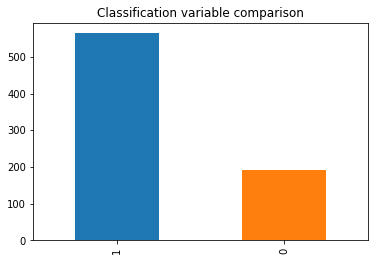

In [6]:
fig, ax = plt.subplots()
fig = df["class"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Classification variable comparison")
plt.show()

##### gender vs target variable

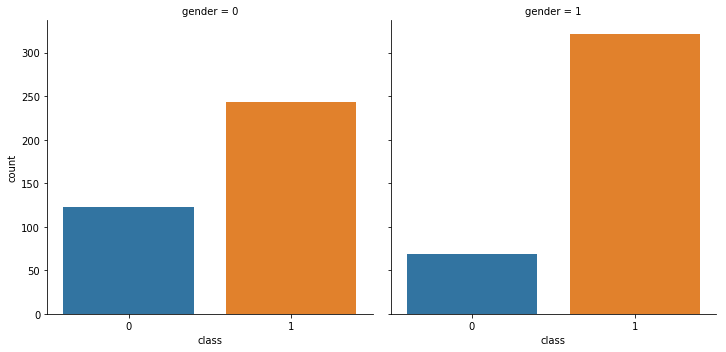

In [7]:
import seaborn as sns

# How does the parkinsons disease depend on the gender?
plot = sns.catplot(x="class", col="gender", data=df, kind="count")

##### Target variable

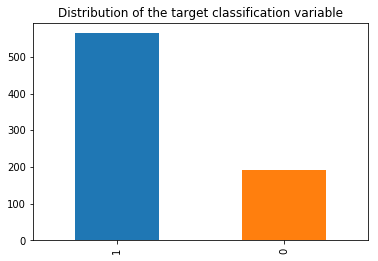

In [8]:
fig, ax = plt.subplots()
fig = df["class"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Distribution of the target classification variable")
plt.show()

##### Correlation matrix
The number of paramaters is really high

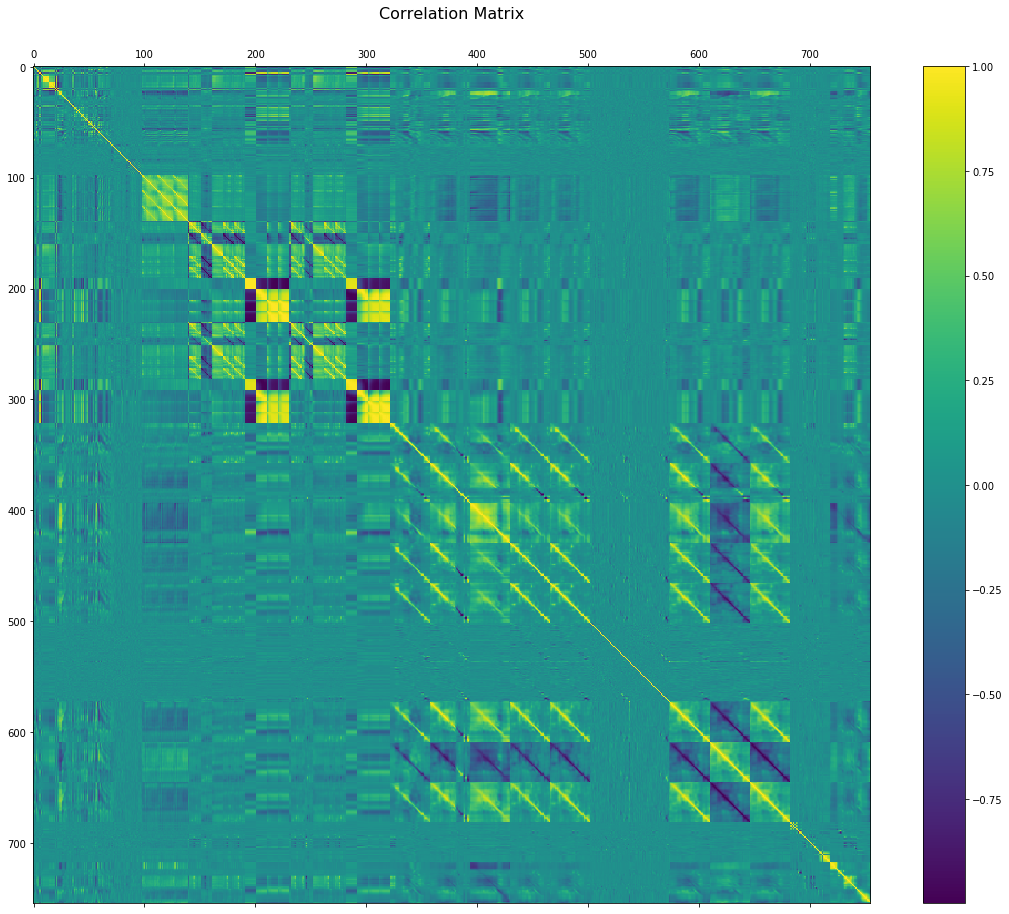

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16);

##### Correlation of attributes with the target variable

In [10]:
corcolumns = df.drop(columns=["class"]).corrwith(df["class"])
corcolumns = pd.DataFrame(corcolumns, columns=["correlation"])
corcolumns["abs_correlation"] = abs(corcolumns.correlation)

In [11]:
corcolumns = corcolumns.sort_values(by="abs_correlation", ascending=False)

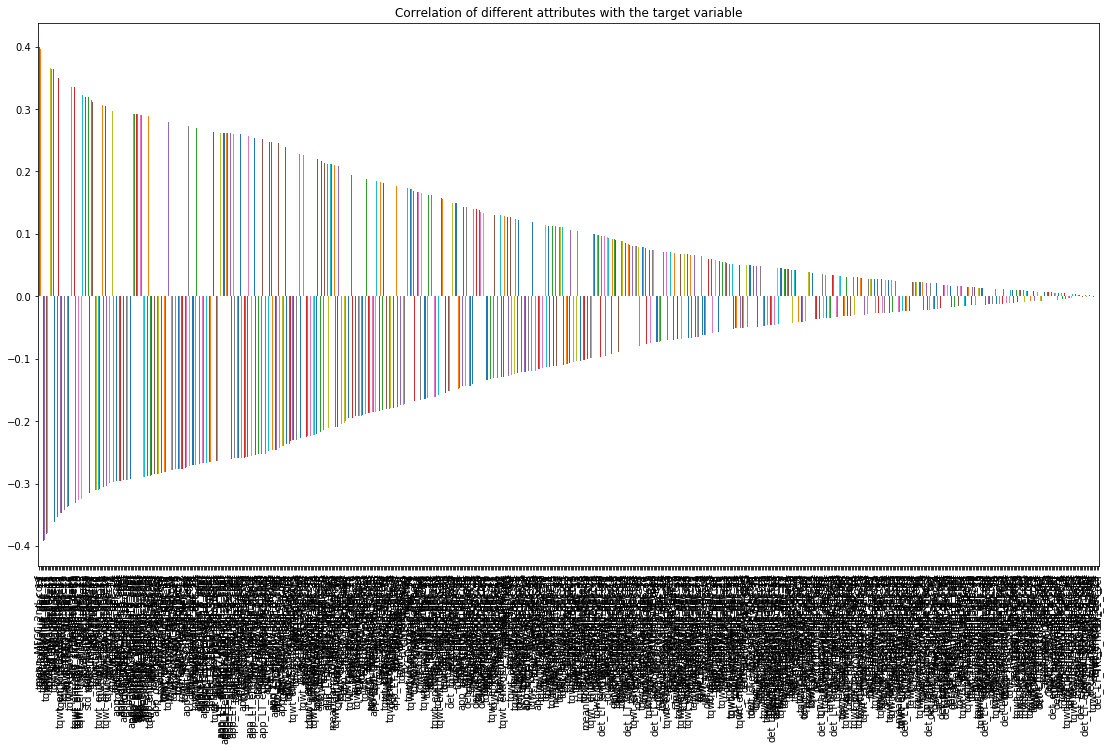

In [12]:
fig, ax = plt.subplots(figsize=(19, 10))
corcolumns.correlation.plot(kind="bar", title="Correlation of different attributes with the target variable", ax=ax)

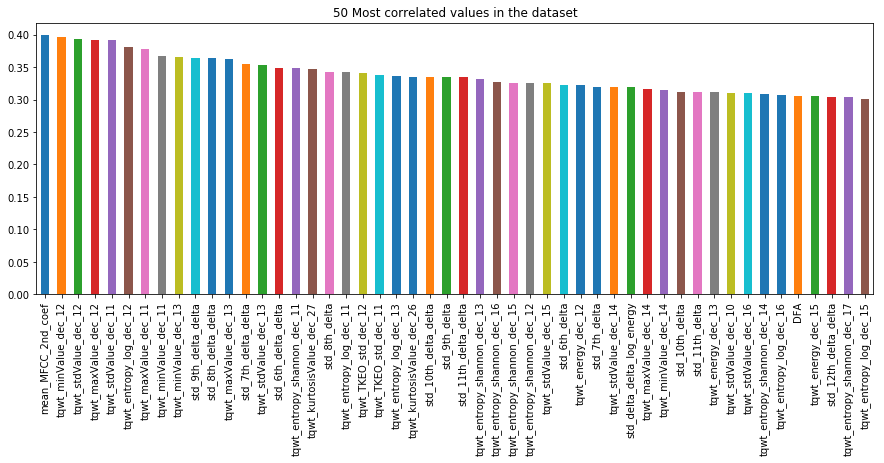

In [13]:
plt.figure(figsize=(15, 5))
corcolumns.abs_correlation.iloc[:50].plot(kind="bar", title="50 Most correlated values in the dataset")
plt.show()

# Train / Test / Validation
Data will be split 65% train, 20% test, 15% validation
Edit: Let's just use cross-validation

In [14]:
train_size = 0.65
test_size = 0.20
valid_size = 0.15

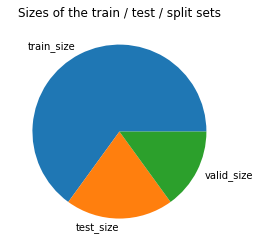

In [15]:
# Visualise the train/test/split ☺️
fig, ax = plt.subplots()
plt.pie([train_size, test_size, valid_size], labels=["train_size", "test_size", "valid_size"])
ax.set_title("Sizes of the train / test / split sets")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=["class"])
y = df["class"]

X_merge, X_valid, y_merge, y_valid = train_test_split(X, y, test_size=valid_size, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_merge, y_merge, test_size=test_size/train_size, random_state=42)

# Model training

In [21]:
# Best model results are stored in the results dictionary
results = {}

#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid = {'max_features' : np.arange(1, 10, 1),
        'n_estimators' : np.arange(1, 15, 1),
        'max_depth': np.arange(1, 10, 1)
       }

randf = GridSearchCV(RandomForestClassifier(), grid, cv=5, verbose=1, n_jobs=8).fit(X_merge, y_merge)
results["RandomForestClassifier"] = randf.best_score_.mean()
print("RandomForestClassifier best score: {} for {}.".format(randf.best_score_.mean(), randf.best_params_))

RandomForestClassifier best score: 0.8535825545171339 for {'max_depth': 6, 'max_features': 9, 'n_estimators': 13}.

#### KNeighborsClassifier
Should normalize???

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)
       }

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=5, verbose=1, n_jobs=8).fit(X_merge, y_merge)
results["KNeighborsClassifier"] = knnclas.best_score_.mean()
print("KNeighborsClassifier best score: {} for {}.".format(knnclas.best_score_, knnclas.best_params_))

Fitting 5 folds for each of 896 candidates, totalling 4480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 352 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 1228 tasks      | elapsed:   10.0s
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done 2628 tasks      | elapsed:   21.1s


KNeighborsClassifier best score: 0.7679127725856698 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 11, 'weights': 'uniform'}.


[Parallel(n_jobs=8)]: Done 4480 out of 4480 | elapsed:   30.0s finished


KNeighborsClassifier best score: 0.7679127725856698 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 11, 'weights': 'uniform'}.

#### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'criterion': ['gini'],
        'min_samples_split' : np.arange(3, 30, 2),
        'min_samples_leaf' : np.arange(3, 12, 1),
        'max_depth': np.arange(4, 12, 1)
       }

dtc = GridSearchCV(DecisionTreeClassifier(), grid, cv=5, verbose=1, n_jobs=8).fit(X_merge, y_merge)
results["DecisionTreeClassifier"] = dtc.best_score_.mean()
print("DecisionTreeClassifier best score: {} for {}.".format(dtc.best_score_.mean(), dtc.best_params_))

DecisionTreeClassifier best score: 0.8442367601246106 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 9}.

#### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gaus = GaussianNB()
results["GaussianNB"] = cross_val_score(gaus, X_merge, y_merge, cv=5, verbose=1, n_jobs=8).mean()
print("GaussianNB score: {}".format(cross_val_score(gaus, X_merge, y_merge, cv=5, verbose=1, n_jobs=8).mean()))

# fit for future testing
gaus.fit(X_merge, y_merge)

GaussianNB score: 0.752313468992248

#### LogisticRegression
kinda sucks for high dimensional inputs

##### MLPClassifier

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import itertools

grid = {"hidden_layer_sizes": [(3,), (5,), (7,), (6, 6), (7,7), (10, 7, 4), (7, 7, 7), (12, 12, 12), (12, 4, 12, 12), (10, 9, 8)],
        "activation": ["relu"],
        "max_iter": [1000],
       }

mlpercp = GridSearchCV(MLPClassifier(), grid, cv=5, verbose=1, n_jobs=8).fit(X_merge, y_merge)
results["MLPClassifier"] = mlpercp.best_score_.mean()
print("MLPClassifier best score: {} for {}.".format(mlpercp.best_score_.mean(), mlpercp.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   34.3s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:   47.9s finished


MLPClassifier best score: 0.7476635514018691 for {'activation': 'relu', 'hidden_layer_sizes': (10, 7, 4), 'max_iter': 1000}.


MLPClassifier best score: 0.7476635514018691 for {'activation': 'relu', 'hidden_layer_sizes': (10, 7, 4), 'max_iter': 1000}.

##### TPOTClassifier

In [30]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2, n_jobs=8, cv=5).fit(X_merge, y_merge)

Generation 1 - Current best internal CV score: 0.8848989898989899
Generation 2 - Current best internal CV score: 0.8848989898989899
Generation 3 - Current best internal CV score: 0.8848989898989899
Generation 4 - Current best internal CV score: 0.8893939393939394
Generation 5 - Current best internal CV score: 0.8893939393939394

Best pipeline: ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=6, max_features=0.55, min_samples_leaf=18, min_samples_split=11, n_estimators=100, subsample=0.8500000000000001), bootstrap=False, criterion=gini, max_features=0.3, min_samples_leaf=16, min_samples_split=16, n_estimators=100)


In [58]:
best_cv = 0
best_classifier = None

for key, value in tpot.evaluated_individuals_.items():
    if value["internal_cv_score"] > best_cv:
        best_cv = value["internal_cv_score"]
        best_classifier = (key, value)

# pipeline_optimizer.export('tpot_exported_pipeline.py')
results["TPOTClassifier"] = best_classifier[1]["internal_cv_score"]
print("TPOTClassifier score: {}".format(best_classifier[1]["internal_cv_score"]))

TPOTClassifier score: 0.8893939393939394


## Select the best classifier

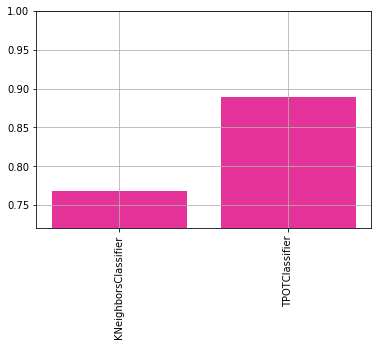

In [61]:
import matplotlib.pyplot as plt

plt.ylim(bottom=0.72, top=1)
plt.bar(range(len(results)), list(results.values()), align='center', color=(.9, .2, .6))
plt.xticks(range(len(results)), list(results.keys()), rotation="vertical")
plt.grid()
plt.show()